In [2]:
import numpy as np
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns
from fasteda import fast_eda
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings 

In [3]:
#Path
carpeta = '/Users/ely/Documents/Maestria/segundo_semestre/cimat2023-1/patrones/Proyecto_1/datos/'
archivos = os.listdir(carpeta)
#lista para almacenar los nombres
productos = []
for archivo in archivos:
    if archivo.endswith('.CSV'):
        nombre_producto = os.path.splitext(archivo)[0] 
        productos.append(nombre_producto)

In [4]:
#cargamos un producto para crear un diccionario clave-ciudad
alquiler = pd.read_csv(carpeta+"alquiler.CSV")
clave=alquiler['Clave ciudad'].unique()
nombre=alquiler['Nombre ciudad'].unique()
diccionario_ciudades=dict(zip(clave, nombre))

In [6]:
#importamos la base con la que vamos a trabajar
df = pd.read_csv(carpeta+"base.CSV")
df.head()

Anio  Mes  Clave ciudad  limon  leche  camaron  tortillas  electricidad  \
0  2018    8             1  33.68  19.00   175.00      14.00        417.35   
1  2018    8             2  14.23  16.58   178.00      16.00        192.79   
2  2018    8             3  13.75  16.00   135.00      11.50        417.35   
3  2018    8             4  20.40  11.17   322.00      10.05        417.35   
4  2018    8             5  20.68  15.47   225.48      16.00        192.79   

   alquiler  frijol  pollo       Fecha    suma  categoria  Season  
0    100.24   33.89  80.75  2018-08-01  873.91          1       3  
1    100.03   37.79  90.00  2018-08-01  645.42          2       3  
2    100.08   32.78  81.00  2018-08-01  807.46          1       3  
3    100.24   38.33  35.00  2018-08-01  954.54          1       3  
4    100.16   43.89  59.24  2018-08-01  673.71          1       3

In [8]:
#definimos un vector aleatorio con los orecios de los 8 productos
X=df[["limon",	"leche"	,"camaron"	,"tortillas"	,"electricidad"	,"alquiler"	,"frijol"	,"pollo"]]
#definimos cuatro variables aleatorias discretas
Y1=df['Mes']
Y2=df['Season']
Y3=df['Anio']
Y4=df['categoria']

PCA

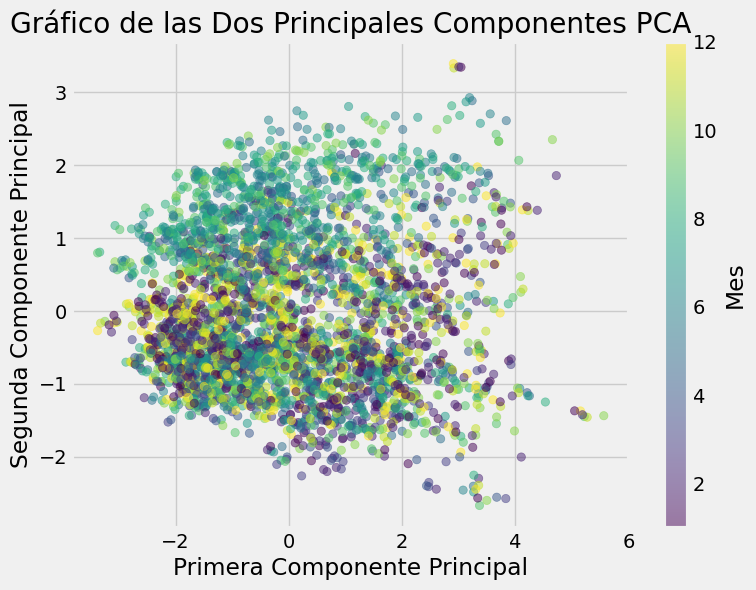

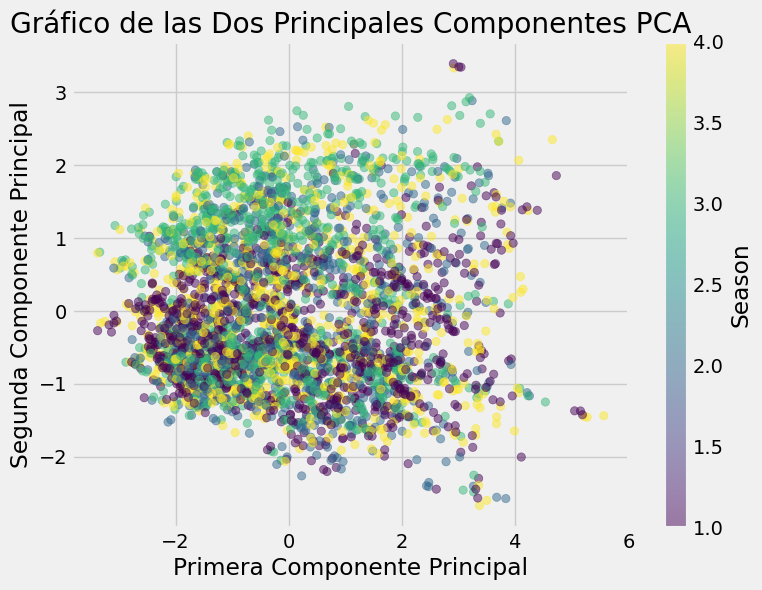

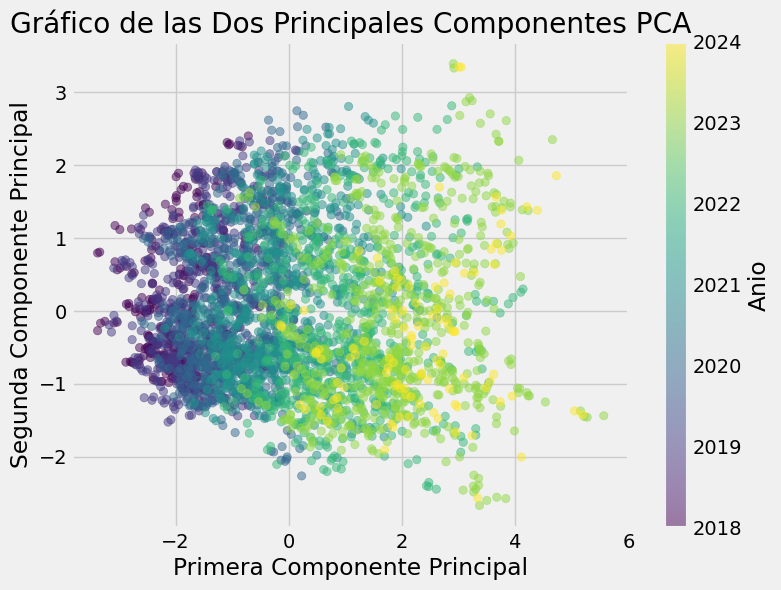

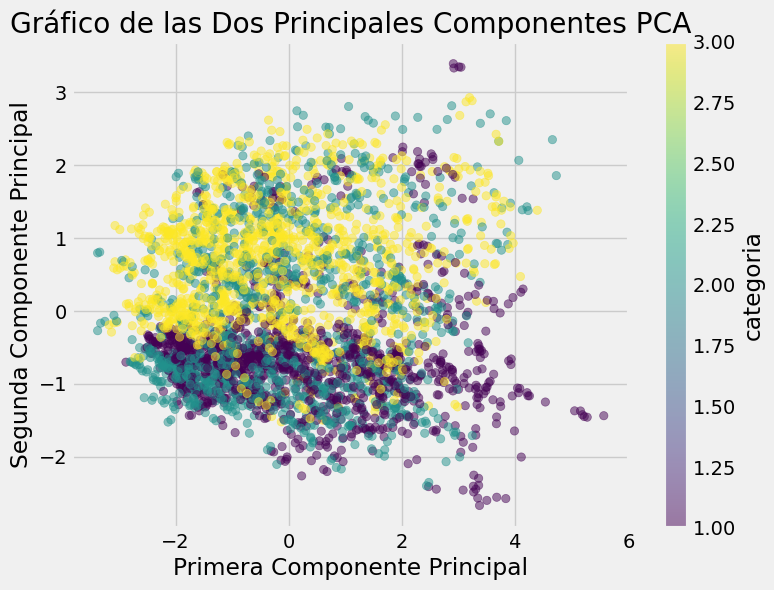

In [11]:
# Normalizamos los datos
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_normalized)

#graficamos las dos primeras componentes usando como hue cada Y
Y=[Y1,Y2,Y3,Y4]
var=['Mes','Season','Anio','categoria']

for y,cat in zip(Y,var):
    # Graficar las dos principales componentes
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y,alpha=0.5)
    plt.xlabel('Primera Componente Principal')
    plt.ylabel('Segunda Componente Principal')
    plt.title('Gráfico de las Dos Principales Componentes PCA')
    plt.colorbar(label=cat)
    plt.grid(True)
    plt.show()



In [12]:
# Acceder al atributo explained_variance_ratio_ para obtener la varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_

# Imprimir el resumen de la varianza explicada
for i, var_ratio in enumerate(explained_variance_ratio):
    print(f'Componente Principal {i+1}: {var_ratio:.2f}')

# Imprimir la varianza explicada acumulativa
cumulative_variance_ratio = explained_variance_ratio.cumsum()
print('\nVarianza explicada acumulativa:')
for i, cum_var_ratio in enumerate(cumulative_variance_ratio):
    print(f'Componente Principal {i+1}: {cum_var_ratio:.2f}')


Componente Principal 1: 0.32
Componente Principal 2: 0.14
Componente Principal 3: 0.13
Componente Principal 4: 0.11
Componente Principal 5: 0.10
Componente Principal 6: 0.08
Componente Principal 7: 0.07
Componente Principal 8: 0.05

Varianza explicada acumulativa:
Componente Principal 1: 0.32
Componente Principal 2: 0.46
Componente Principal 3: 0.60
Componente Principal 4: 0.71
Componente Principal 5: 0.81
Componente Principal 6: 0.89
Componente Principal 7: 0.95
Componente Principal 8: 1.00


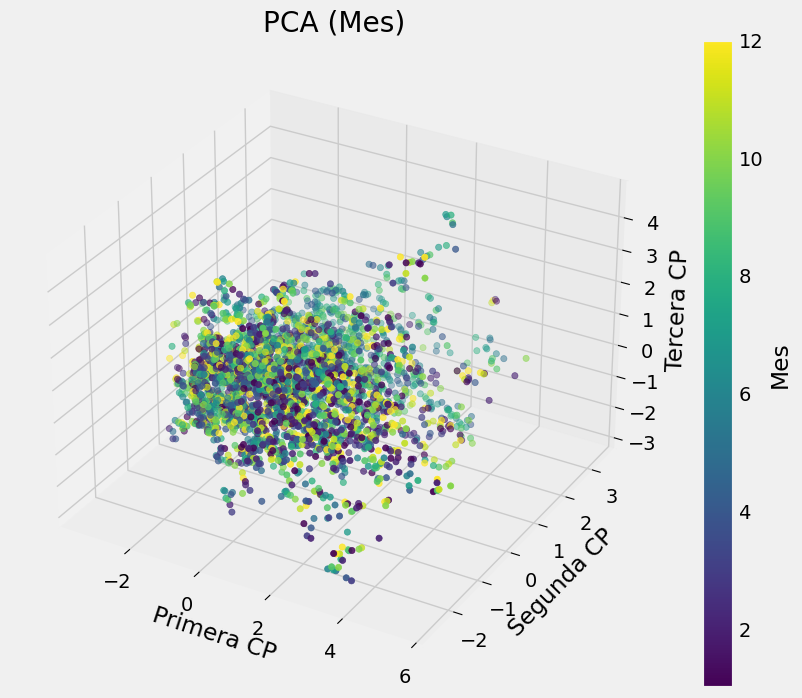

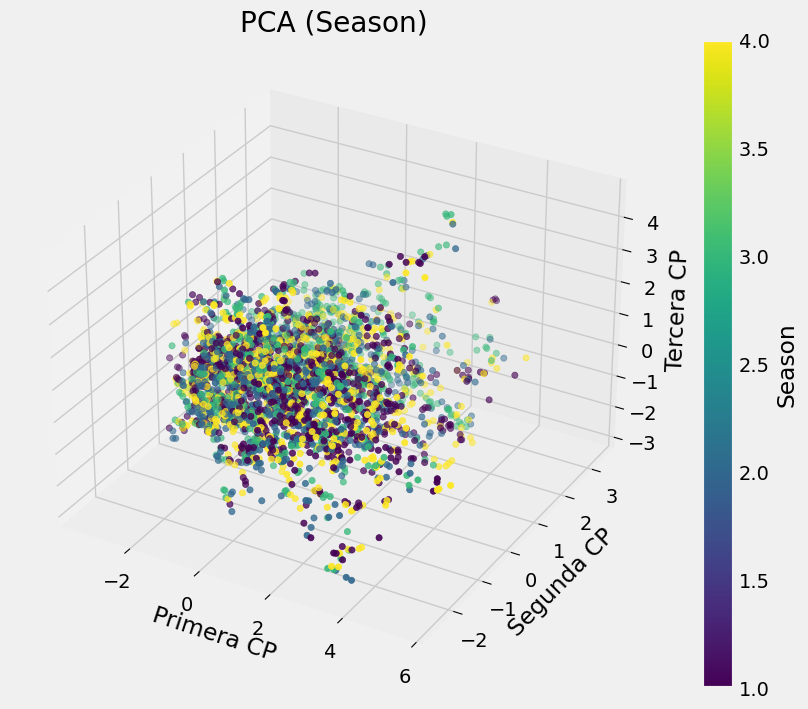

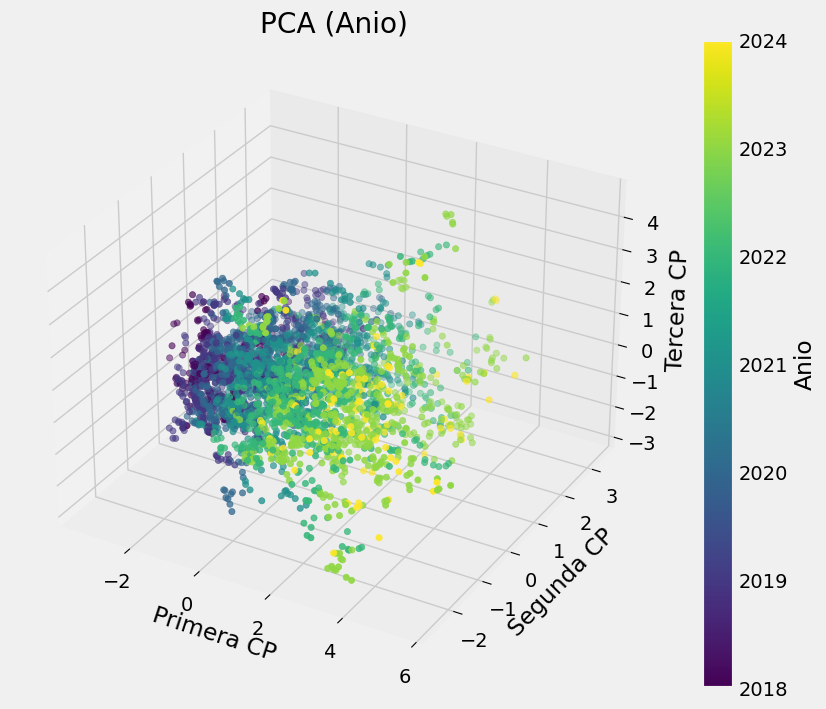

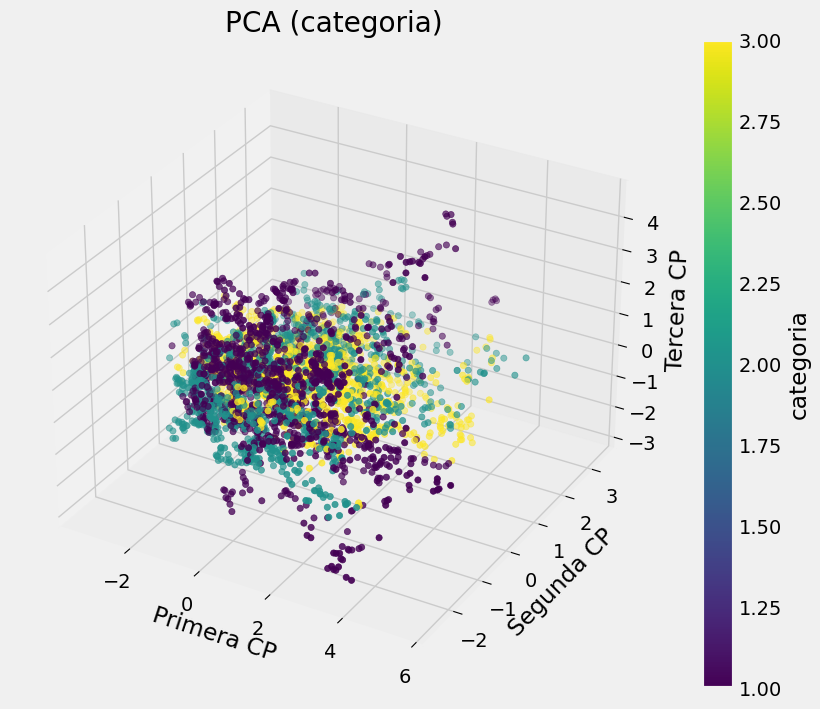

In [104]:

for y,cat in zip(Y,var):
    # Graficamos en tres dimensiones
    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection='3d')
    scatter = ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis')
    plt.xlabel('Primera CP')
    plt.ylabel('Segunda CP')
    ax.set_zlabel('Tercera CP')
    plt.title('PCA ('+cat+')')
    plt.colorbar(scatter, label=cat)
    plt.show()


In [105]:
for y,cat in zip(Y,var):
    fig = go.Figure()
    fig.add_trace(go.Scatter3d(
        x=X_pca[:, 0],
        y=X_pca[:, 1],
        z=X_pca[:, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=y,
            colorscale='viridis',
            opacity=0.8
        ),
        text=cat,
        name='PCA 3D'
    ))
    fig.update_layout(
    scene=dict(
        xaxis=dict(title='Primera CP'),
        yaxis=dict(title='Segunda CP'),
        zaxis=dict(title='Tercera CP')
    ),
    title='Primeras tres componentes principales, '+cat
    )
    fig.show()



K-means

In [25]:
#método del codo para determinar el numero de codos adecuado
def elbow(datos,N):
    suma_quad = [] #lista vacia para almacenar la suma de las dist cuadradas
    for k in range(1,N):
        kmeans = KMeans(n_clusters=k) #aplicamos kmeans
        kmeans.fit(datos) 
        suma_quad.append(kmeans.inertia_) #agregamos a la lista la suma correspondiente
    #graficamos
    plt.figure(figsize=(8, 6))
    plt.plot(range(1,N), suma_quad, 'bx-')
    plt.xlabel('Clusters')
    plt.ylabel('Distancia')
    plt.title('Elbow Method')
    plt.xticks(np.arange(1, N, 1))
    plt.show()



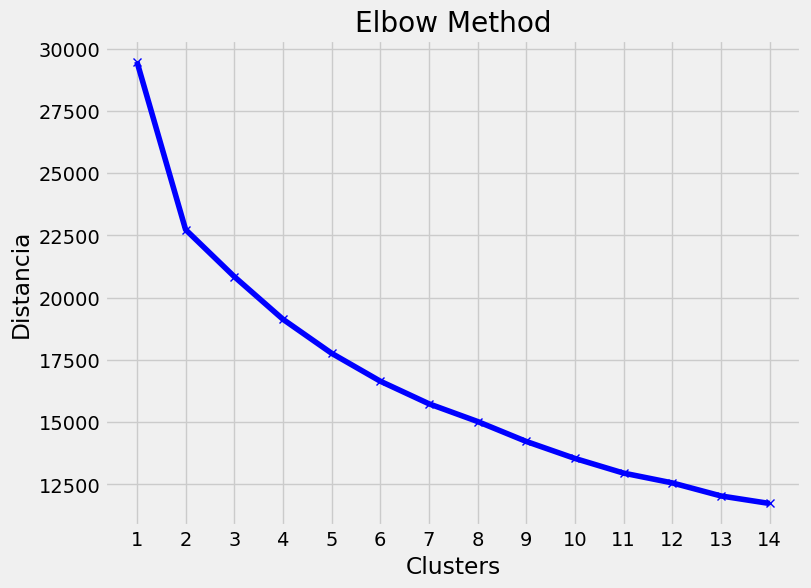

In [26]:
warnings.filterwarnings("ignore") #aqui aparecian muchos warnings por lo que importe warnings  para no imprimirlos
elbow(X_pca,15)

In [79]:

cluster_num=4
# Aplicación del algoritmo k-means
kmeans = KMeans(n_clusters=cluster_num)
kmeans.fit(X_pca)
y_kmeans=kmeans.predict(X_pca)


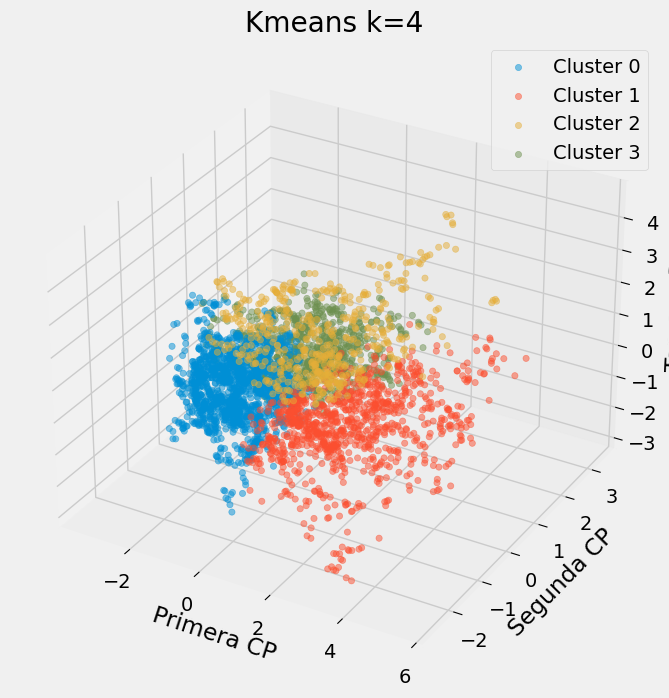

In [80]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(cluster_num):
    scatter = ax.scatter3D(X_pca[y_kmeans == i, 0], X_pca[y_kmeans == i, 1], X_pca[y_kmeans == i, 2],
                            label=f'Cluster {i}', alpha=0.5, cmap='viridis')

ax.set_xlabel('Primera CP')
ax.set_ylabel('Segunda CP')
ax.set_zlabel('Tercera CP')
plt.title('Kmeans k=4')
plt.legend()
plt.show()


In [81]:
# Crear la figura
fig = go.Figure()

# Añadir los datos al gráfico en tres dimensiones
fig.add_trace(go.Scatter3d(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    z=X_pca[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=y_kmeans,
        colorscale='viridis',
        opacity=0.8
    ),
    text=Y,
    name='PCA 3D'
))

# Configurar el diseño del gráfico
fig.update_layout(
    scene=dict(
        xaxis=dict(title='Primera CP'),
        yaxis=dict(title='Segunda CP'),
        zaxis=dict(title='Tercera CP')
    ),
    title='K-means k=4'
)

# Mostrar la figura
fig.show()

En el cluster 0 hay 1373 datos
En el cluster 1 hay 943 datos
En el cluster 2 hay 506 datos
En el cluster 3 hay 863 datos


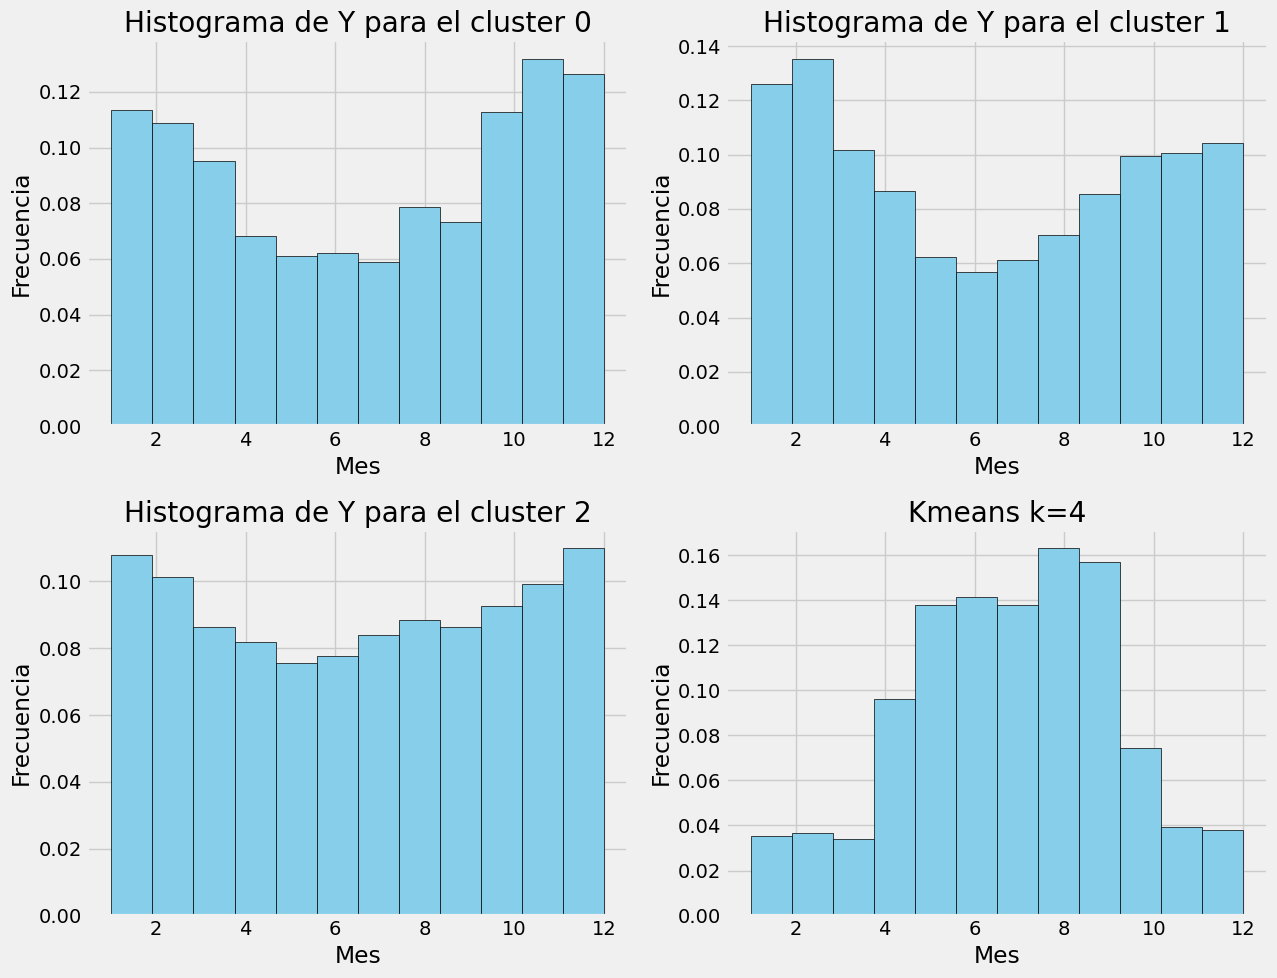

En el cluster 0 hay 1373 datos
En el cluster 1 hay 943 datos
En el cluster 2 hay 506 datos
En el cluster 3 hay 863 datos


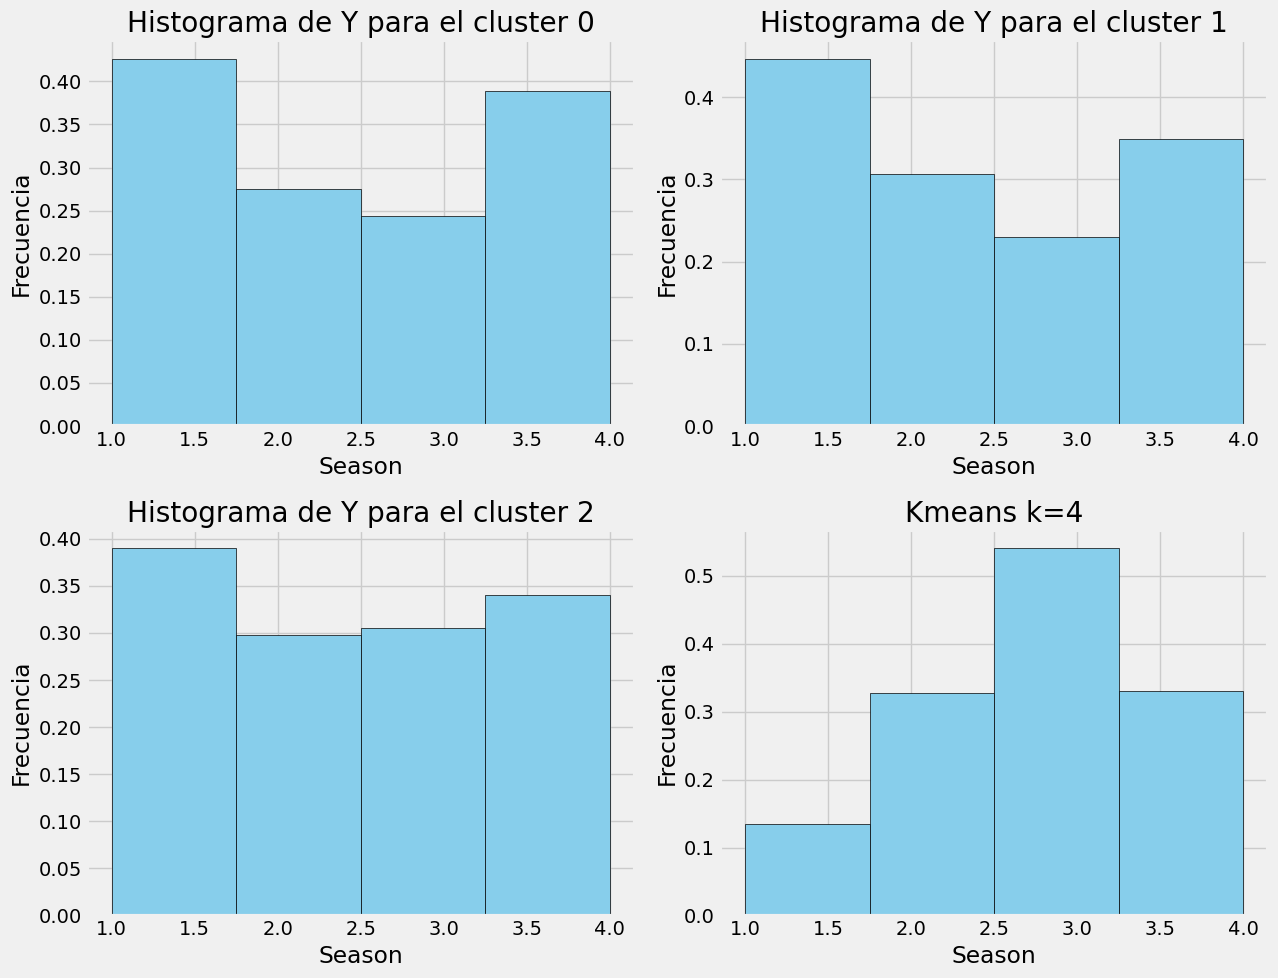

En el cluster 0 hay 1373 datos
En el cluster 1 hay 943 datos
En el cluster 2 hay 506 datos
En el cluster 3 hay 863 datos


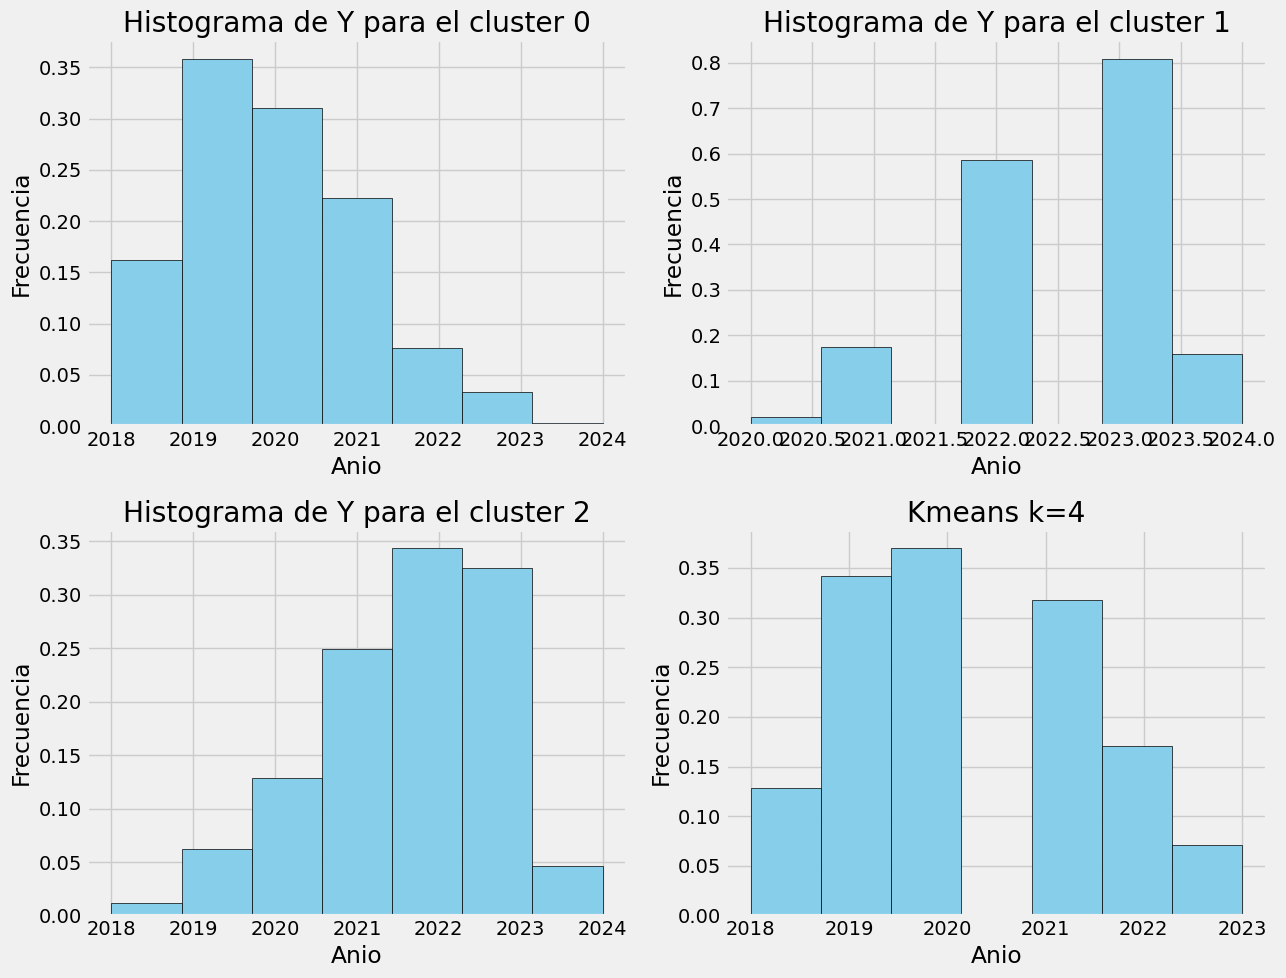

En el cluster 0 hay 1373 datos
En el cluster 1 hay 943 datos
En el cluster 2 hay 506 datos
En el cluster 3 hay 863 datos


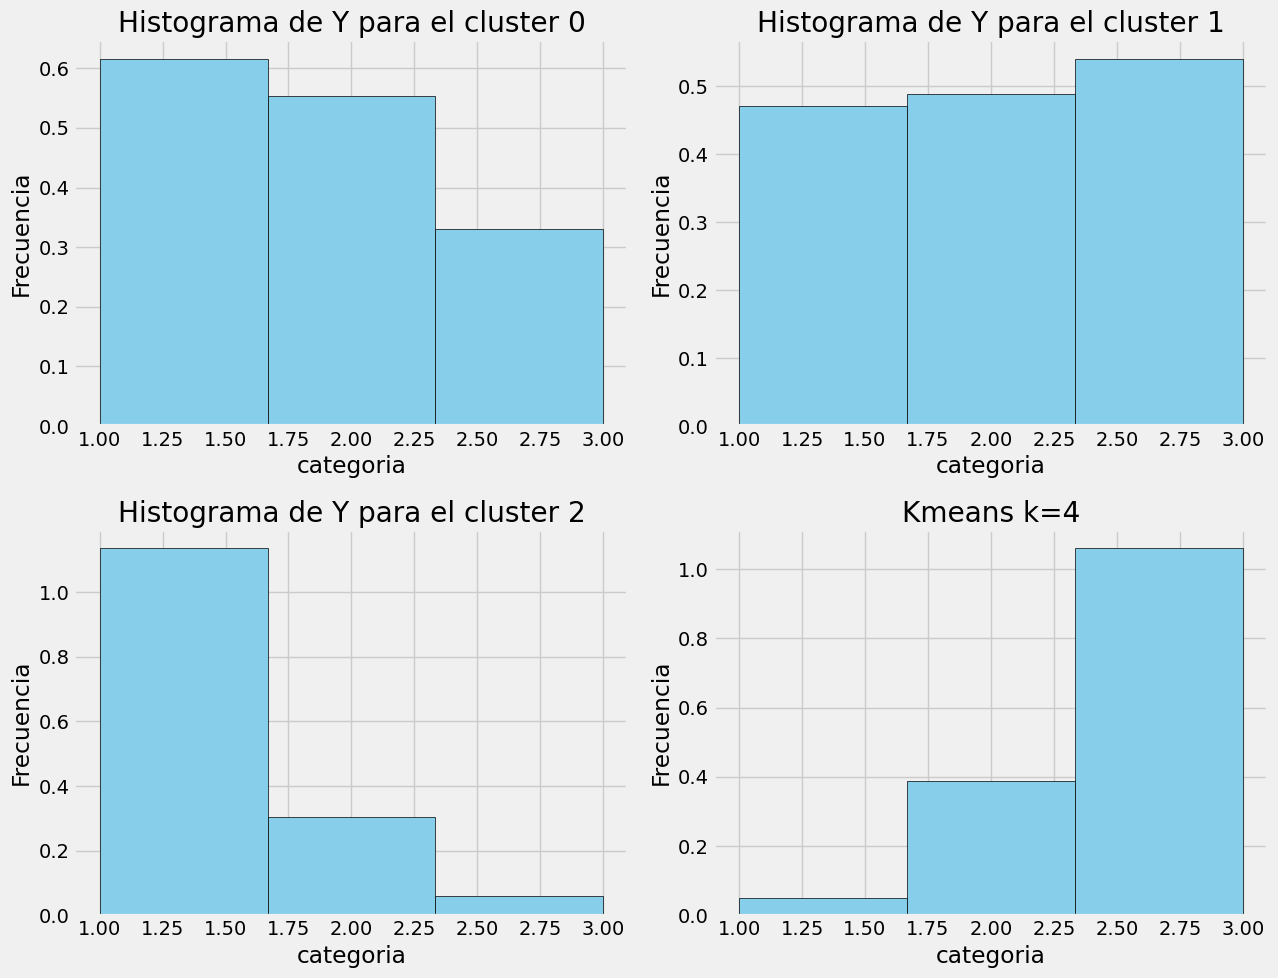

In [82]:
for y,cat in zip(Y,var):
        # Crea la figura y los ejes de los subplots
    fig, axs = plt.subplots(2, 2, figsize=(13, 10))

    # Itera sobre los clusters
    for i in range(cluster_num):
        # Obtiene los índices correspondientes a este cluster
        indices = np.where(y_kmeans == i)[0]
        print("En el cluster", i, "hay", indices.shape[0], "datos")
        # Obtiene los valores de la variable Y correspondientes a los índices
        Y_subset = y[indices]
        # Calcula las coordenadas del subplot actual
        row = i // 2
        col = i % 2
        # Crea el histograma en el subplot correspondiente
        axs[row, col].hist(Y_subset, bins=len(y.unique()), color='skyblue', edgecolor='black', density=True)
        # Añade etiquetas y título
        axs[row, col].set_xlabel(cat)
        axs[row, col].set_ylabel('Frecuencia')
        axs[row, col].set_title(f'Histograma de Y para el cluster {i}')

    # Ajusta el espacio entre los subplots
    plt.tight_layout()
    plt.title('Kmeans k=4')
    # Muestra los histogramas
    plt.show()

Vamos a repetir con 6 clusters, y comprobr las etiquetas de año:

In [99]:
cluster_num=7
# Aplicación del algoritmo k-means
kmeans = KMeans(n_clusters=cluster_num)
kmeans.fit(X_pca)
y_kmeans=kmeans.predict(X_pca)

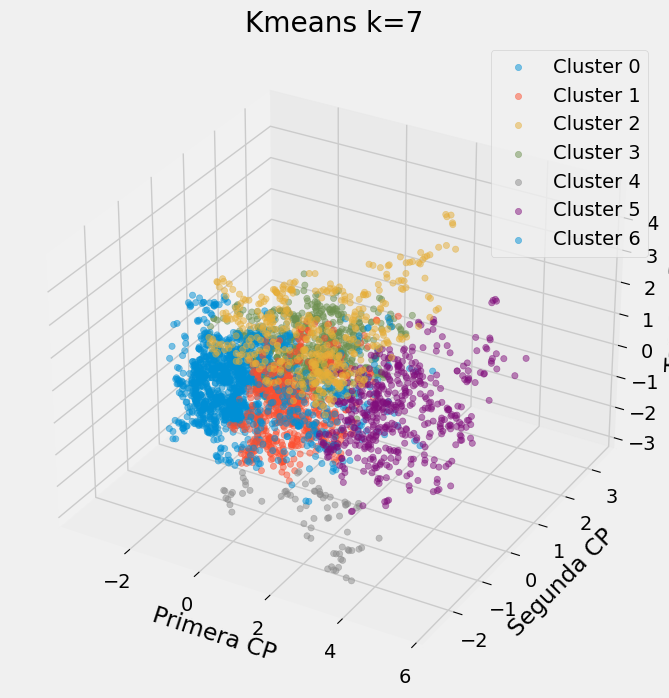

In [100]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(cluster_num):
    scatter = ax.scatter3D(X_pca[y_kmeans == i, 0], X_pca[y_kmeans == i, 1], X_pca[y_kmeans == i, 2],
                            label=f'Cluster {i}', alpha=0.5, cmap='viridis')

ax.set_xlabel('Primera CP')
ax.set_ylabel('Segunda CP')
ax.set_zlabel('Tercera CP')
plt.title(f'Kmeans k={cluster_num}')
plt.legend()
plt.show()

In [101]:
# Crear la figura
fig = go.Figure()

# Añadir los datos al gráfico en tres dimensiones
fig.add_trace(go.Scatter3d(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    z=X_pca[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=y_kmeans,
        colorscale='viridis',
        opacity=0.8
    ),
    text=Y,
    name='PCA 3D'
))

# Configurar el diseño del gráfico
fig.update_layout(
    scene=dict(
        xaxis=dict(title='Primera CP'),
        yaxis=dict(title='Segunda CP'),
        zaxis=dict(title='Tercera CP')
    ),
    title='K-means k=7'
)

# Mostrar la figura
fig.show()

En el cluster 0 hay 1055 datos
En el cluster 1 hay 605 datos
En el cluster 2 hay 454 datos
En el cluster 3 hay 780 datos
En el cluster 4 hay 73 datos
En el cluster 5 hay 475 datos
En el cluster 6 hay 243 datos


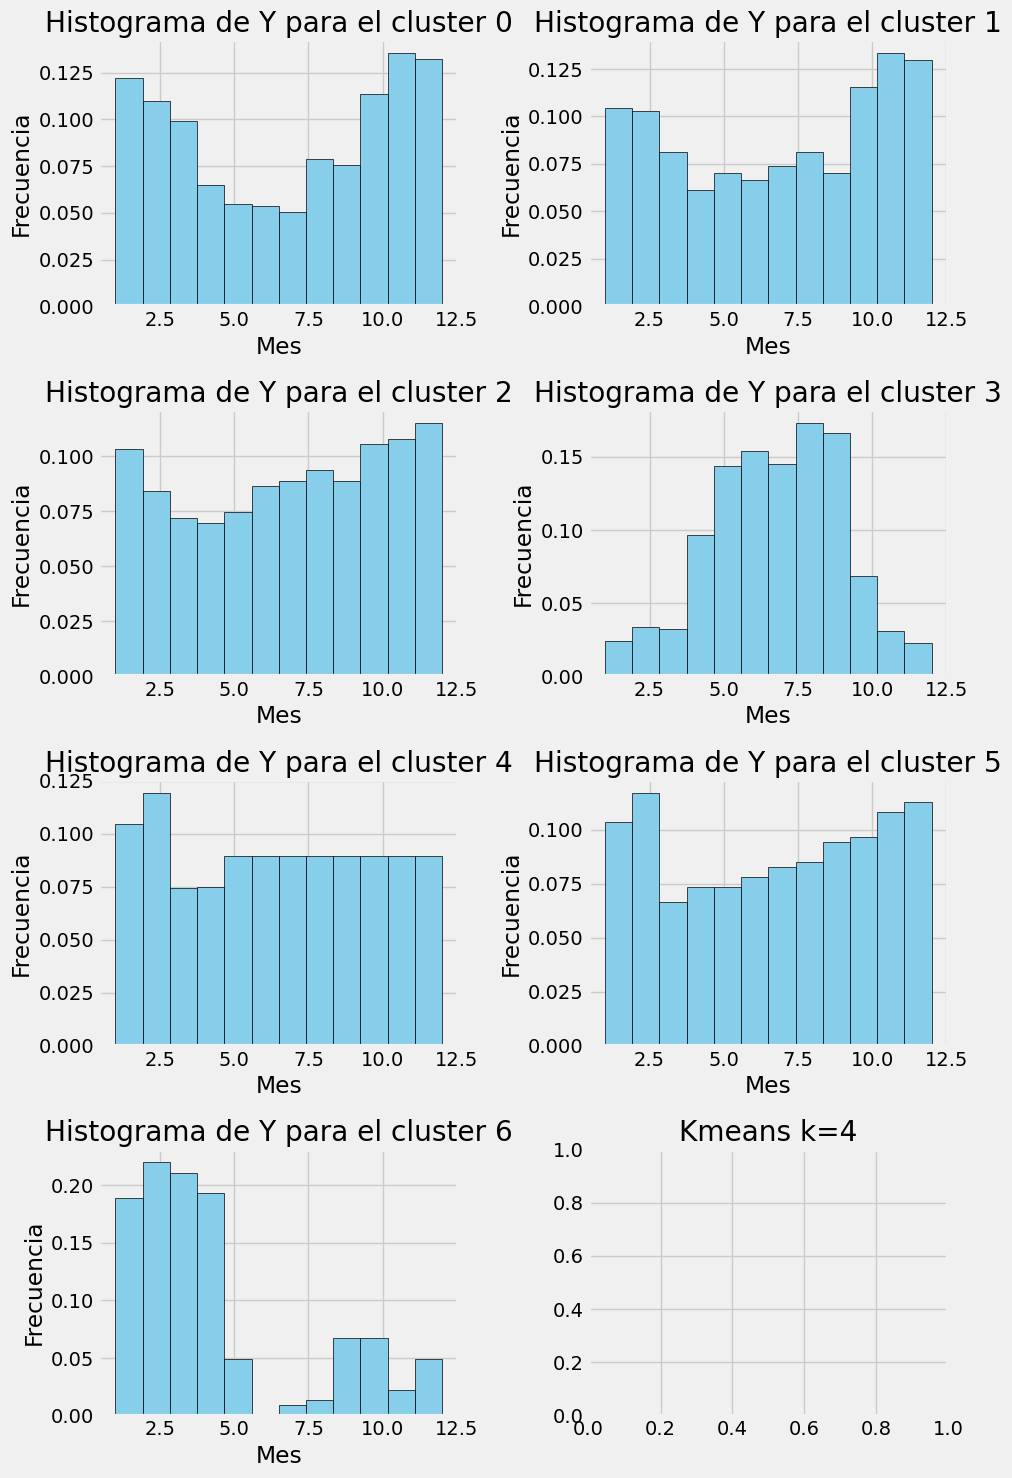

En el cluster 0 hay 1055 datos
En el cluster 1 hay 605 datos
En el cluster 2 hay 454 datos
En el cluster 3 hay 780 datos
En el cluster 4 hay 73 datos
En el cluster 5 hay 475 datos
En el cluster 6 hay 243 datos


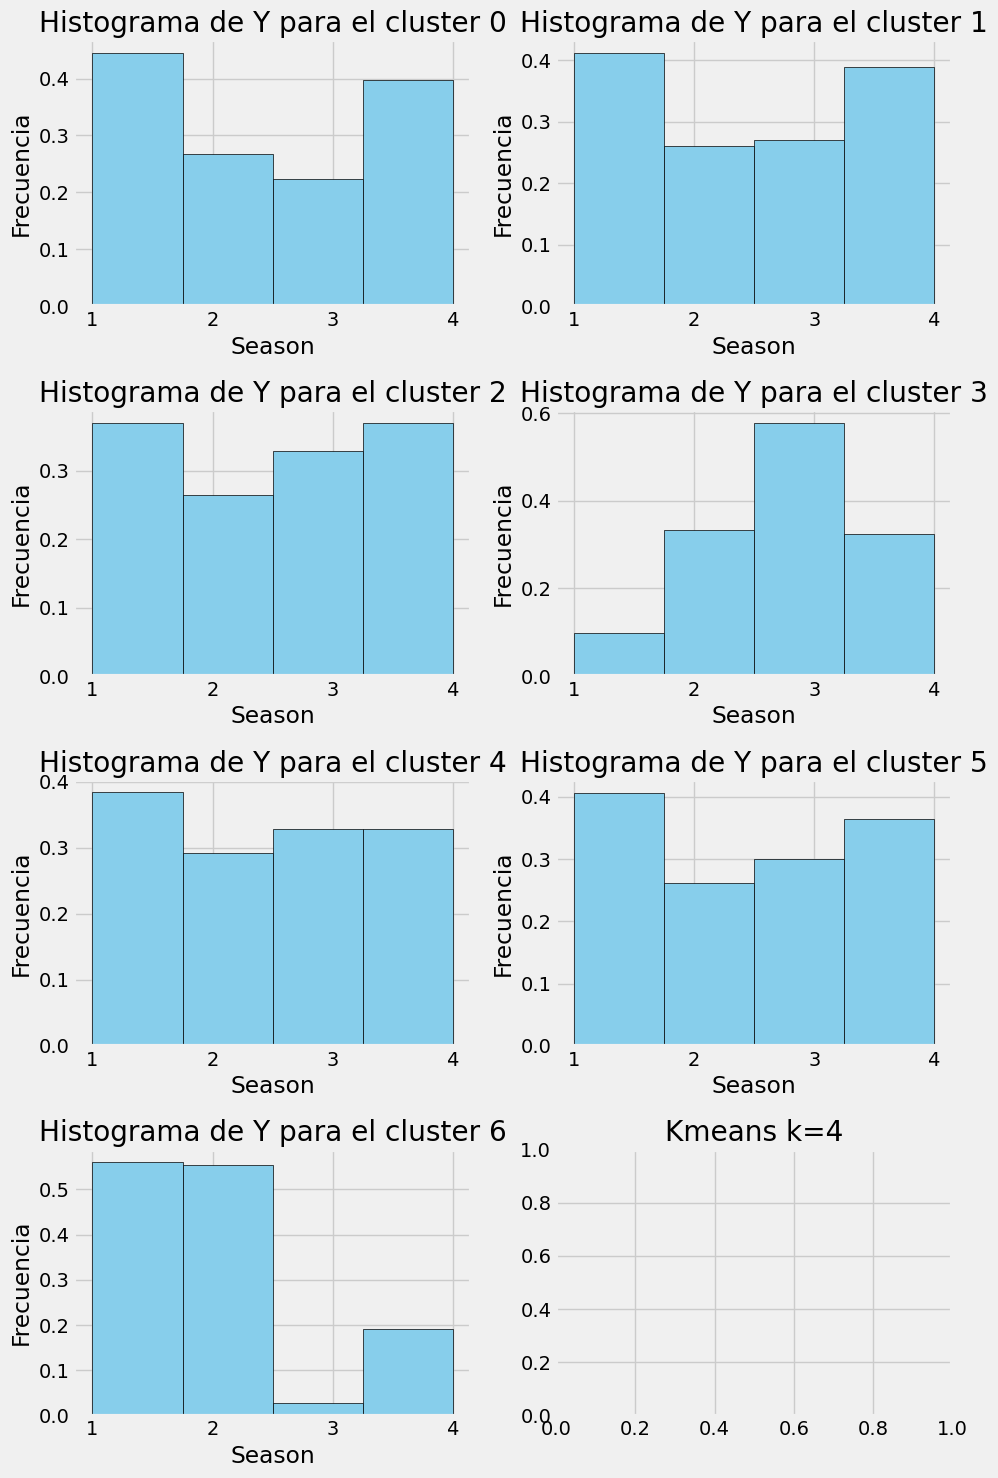

En el cluster 0 hay 1055 datos
En el cluster 1 hay 605 datos
En el cluster 2 hay 454 datos
En el cluster 3 hay 780 datos
En el cluster 4 hay 73 datos
En el cluster 5 hay 475 datos
En el cluster 6 hay 243 datos


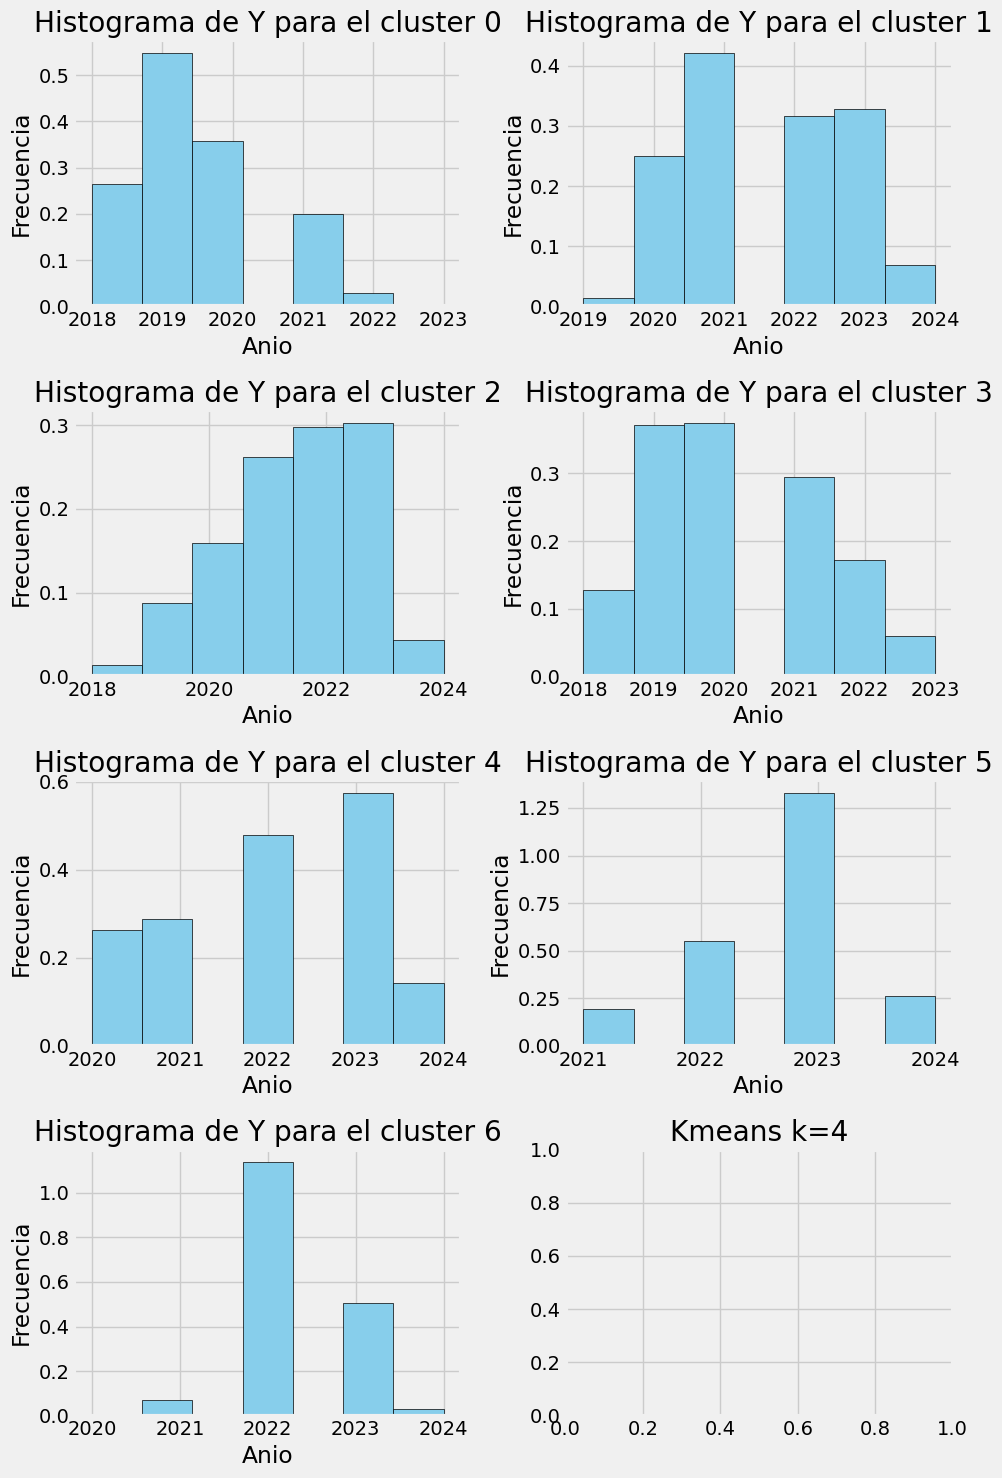

En el cluster 0 hay 1055 datos
En el cluster 1 hay 605 datos
En el cluster 2 hay 454 datos
En el cluster 3 hay 780 datos
En el cluster 4 hay 73 datos
En el cluster 5 hay 475 datos
En el cluster 6 hay 243 datos


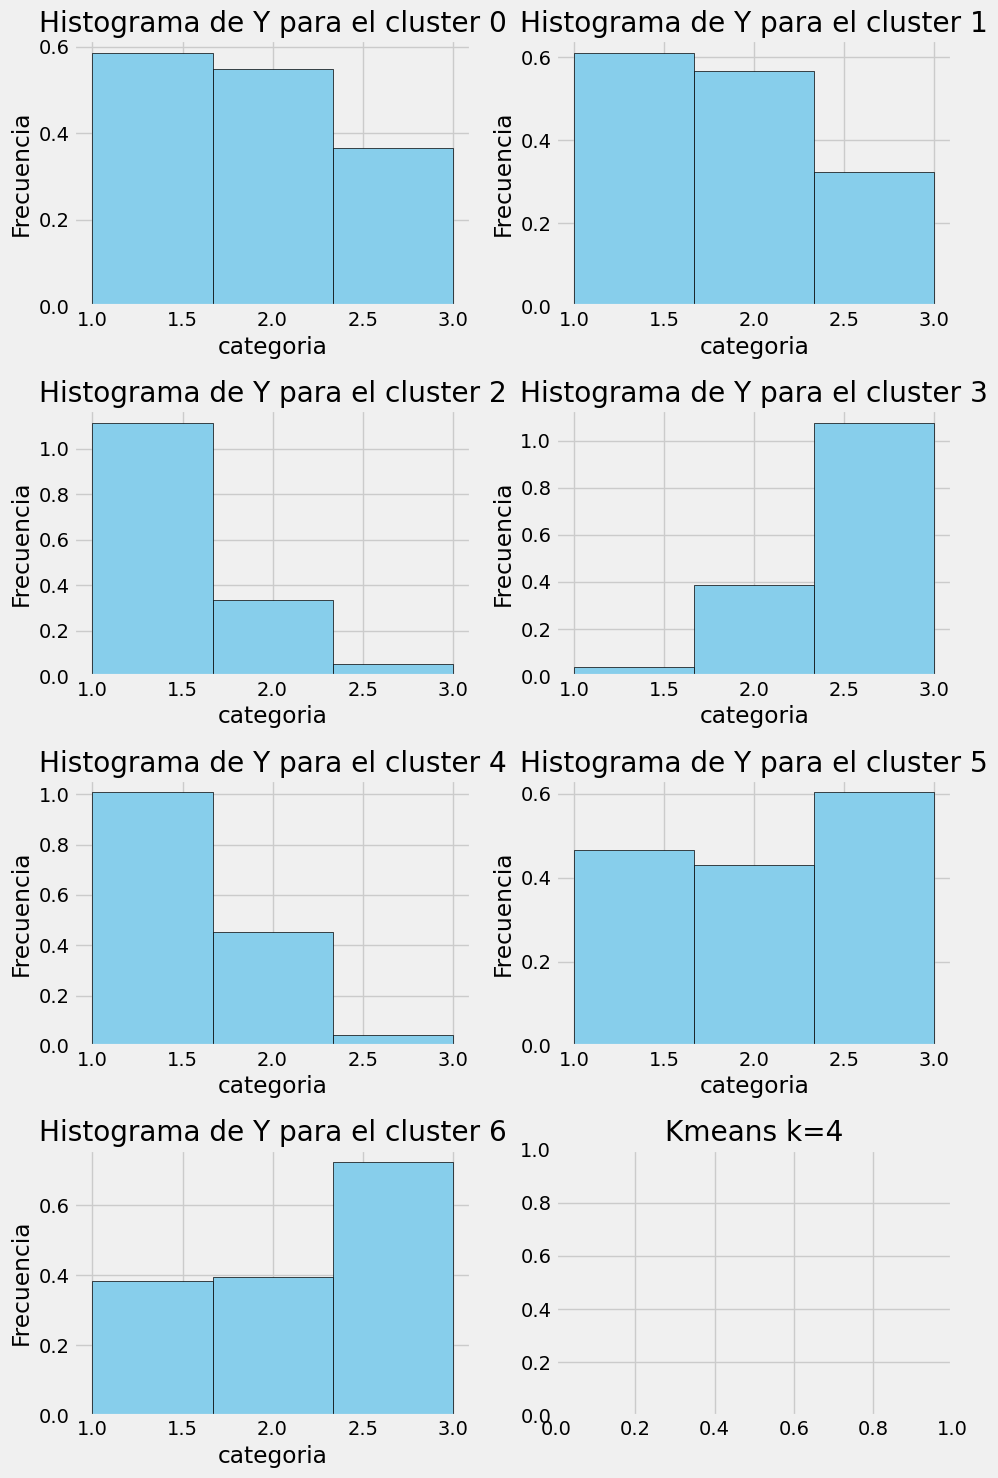

In [102]:
for y,cat in zip(Y,var):
        # Crea la figura y los ejes de los subplots
    fig, axs = plt.subplots(4, 2, figsize=(10, 15))

    # Itera sobre los clusters
    for i in range(cluster_num):
        # Obtiene los índices correspondientes a este cluster
        indices = np.where(y_kmeans == i)[0]
        print("En el cluster", i, "hay", indices.shape[0], "datos")
        # Obtiene los valores de la variable Y correspondientes a los índices
        Y_subset = y[indices]
        # Calcula las coordenadas del subplot actual
        row = i // 2
        col = i % 2
        # Crea el histograma en el subplot correspondiente
        axs[row, col].hist(Y_subset, bins=len(y.unique()), color='skyblue', edgecolor='black', density=True)
        # Añade etiquetas y título
        axs[row, col].set_xlabel(cat)
        axs[row, col].set_ylabel('Frecuencia')
        axs[row, col].set_title(f'Histograma de Y para el cluster {i}')

    # Ajusta el espacio entre los subplots
    plt.tight_layout()
    plt.title('Kmeans k=4')
    # Muestra los histogramas
    plt.show()